In [21]:
import numpy as np
import imageio
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Création du validation set

**Pistes** : Augmentation

On sépare 20% de nos données pour créer un validation set et un training set avec les 80% restants. On veut que les données soient réparties (autant de représentation de chaque illustration pour chacun des sets)

## Création du dataset
Création de **data** en chargeant toutes les images en une liste de numpy array et création de la liste **target** correspondante.

In [9]:
PATH_TO_RESOURCES = '../resources/train/'

In [10]:
X = []
y = []
for root, dirs, files in os.walk(PATH_TO_RESOURCES):
    for name in files:
        if name.endswith((".png")):
            file_path = os.path.join(root, name)
            dir_name = root.split(os.path.sep)[-1]
            im = imageio.imread(file_path)
            X.append(im)
            y.append(dir_name)
print("done")

done


### z = np.array(0)
z = np.append(z, '5')
z.shape

In [26]:
def display_repartition(y_train, y_test):
    train = [0] * 57
    test = [0] * 57
    
    for i in range (len(y_train)):
        train[int(y_train[i]) - 1]+=1
    for i in range (len(y_test)):
        test[int(y_test[i]) - 1]+=1
    print("Nombre de data pour la classe au numéro de l'index dans le train set.")
    print(train)
    print("Nombre de data pour la classe au numéro de l'index dans le test set.")
    print(test)
    '''
    x_axis = list(range(1, 58))
    plt.plot(x_axis, y_train, label="Nombre de données dans le train set")
    plt.plot(x_axis, y_test, label="Nombre de données dans le test set")
    plt.legend()
    plt.show()
    '''

**Répartition aléatoire du train set**
On constate que la répartition n'est pas très bonne : certaines classes ne sont pas représentée dans le test set alors que d'autres sont sous représentées dans le train set.

Nombre de data pour la classe au numéro de l'index dans le train set.
[4, 5, 3, 3, 3, 4, 5, 5, 5, 3, 2, 3, 4, 3, 5, 5, 4, 3, 4, 3, 5, 5, 3, 4, 4, 3, 5, 3, 4, 5, 5, 4, 2, 3, 5, 5, 4, 4, 4, 5, 4, 4, 3, 5, 5, 5, 5, 4, 3, 5, 5, 5, 3, 5, 4, 3, 2]
Nombre de data pour la classe au numéro de l'index dans le test set.
[1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 3, 2, 1, 2, 0, 0, 1, 2, 1, 2, 0, 0, 2, 1, 1, 2, 0, 2, 1, 0, 0, 1, 3, 2, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 2, 3]


ValueError: x and y must have same first dimension, but have shapes (57,) and (228,)

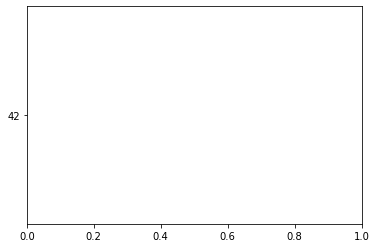

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
display_repartition(y_train, y_test)

**Activation de stratify**
La répartition des données entre le train set et le test set est parfaite.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)
display_repartition(y_train, y_test)

Nombre de data pour la classe au numéro de l'index dans le train set.
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
Nombre de data pour la classe au numéro de l'index dans le test set.
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
